Week 9: Cloud-Hosted Notebook with Data Manipulation

Ingest:
1.basic info

In [3]:
import pandas as pd

example_csv = "https://github.com/fivethirtyeight/data/blob/15f210532b2a642e85738ddefa7a2945d47e2585/world-cup-predictions/wc-20140609-140000.csv?raw=True"
data = pd.read_csv(example_csv)
data.head()

,country,country_id,group,spi,spi_offense,spi_defense,win_group,sixteen,quarter,semi,cup,win
0,Algeria,ALG,h,63.43,1.1208,1.1636,0.0631,0.2032,0.038517,0.007996,0.001021,0.000126
1,Argentina,ARG,f,90.00,2.8541,0.4494,0.7350,0.9279,0.669904,0.468159,0.281758,0.127799
2,Australia,AUS,b,69.45,1.6395,1.2349,0.0151,0.0762,0.009646,0.002943,0.000671,0.000093
3,Belgium,BEL,h,81.97,2.1373,0.7410,0.4781,0.7688,0.351536,0.148459,0.054136,0.014904
4,Bosnia and Herzegovina,BIH,f,80.31,2.3113,0.9861,0.1599,0.5589,0.261950,0.112098,0.031611,0.008964


In [2]:
data.tail()


In [4]:
data.shape

EDA:

In [6]:
data.describe()

2.0

What is the distribution of Soccer Power Index for the 2018 World Cup?

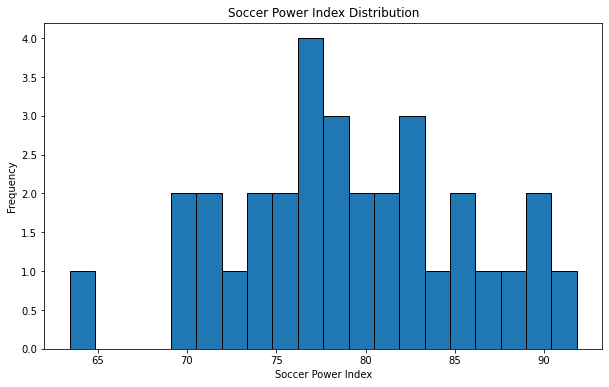

In [5]:
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
plt.figure(figsize=(10, 6))
plt.hist(data["spi"], bins=20, edgecolor="black")
plt.title("Soccer Power Index Distribution")
plt.xlabel("Soccer Power Index")
plt.ylabel("Frequency")
plt.show() 

What is each group's chance of winning the World Cup?

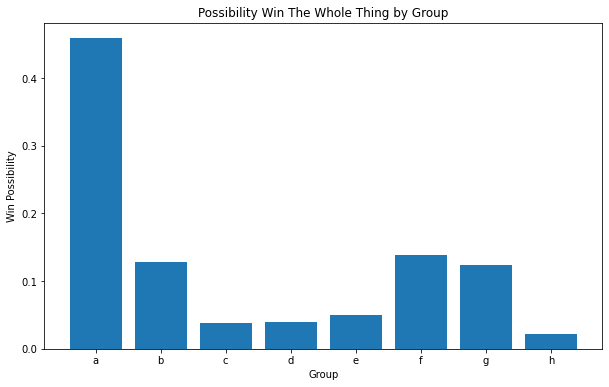

In [9]:
df = data.groupby("group")["win"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(df["group"].tolist(), df["win"].tolist())  # Convert to lists
plt.title("Possibility Win The Whole Thing by Group")
plt.xlabel("Group")
plt.ylabel("Win Possibility")
plt.show()

Load another day's prediction and merge them together:

In [10]:
import pandas as pd

example_csv2 = "https://github.com/fivethirtyeight/data/blob/15f210532b2a642e85738ddefa7a2945d47e2585/world-cup-predictions/wc-20140613-205820.csv?raw=True"
data2 = pd.read_csv(example_csv)
data2.head()

,country,country_id,group,spi,spi_offense,spi_defense,win_group,sixteen,quarter,semi,cup,win
0,Algeria,ALG,h,63.43,1.1208,1.1636,0.0631,0.2032,0.038517,0.007996,0.001021,0.000126
1,Argentina,ARG,f,90.00,2.8541,0.4494,0.7350,0.9279,0.669904,0.468159,0.281758,0.127799
2,Australia,AUS,b,69.45,1.6395,1.2349,0.0151,0.0762,0.009646,0.002943,0.000671,0.000093
3,Belgium,BEL,h,81.97,2.1373,0.7410,0.4781,0.7688,0.351536,0.148459,0.054136,0.014904
4,Bosnia and Herzegovina,BIH,f,80.31,2.3113,0.9861,0.1599,0.5589,0.261950,0.112098,0.031611,0.008964


In [ ]:
data2.describe()

In [17]:
# Merge data and data2
#merged_data = pd.concat([data, data2])

# Reset the index after concatenation
#merged_data.reset_index(drop=True, inplace=True)

# Merge data and data2 using pd.merge
merged_data = pd.merge(data, data2, on="country")

# Print the head of the merged DataFrame
print(merged_data.head())

                  country country_id_x group_x  spi_x  spi_offense_x  \
0                 Algeria          ALG       h  63.43         1.1208   
1               Argentina          ARG       f  90.00         2.8541   
2               Australia          AUS       b  69.45         1.6395   
3                 Belgium          BEL       h  81.97         2.1373   
4  Bosnia and Herzegovina          BIH       f  80.31         2.3113   

   spi_defense_x  win_group_x  sixteen_x  quarter_x    semi_x     cup_x  \
0         1.1636       0.0631     0.2032   0.038517  0.007996  0.001021   
1         0.4494       0.7350     0.9279   0.669904  0.468159  0.281758   
2         1.2349       0.0151     0.0762   0.009646  0.002943  0.000671   
3         0.7410       0.4781     0.7688   0.351536  0.148459  0.054136   
4         0.9861       0.1599     0.5589   0.261950  0.112098  0.031611   

      win_x country_id_y group_y  spi_y  spi_offense_y  spi_defense_y  \
0  0.000126          ALG       h  63.43    

Compare two days' prediction of winning the World Cup:

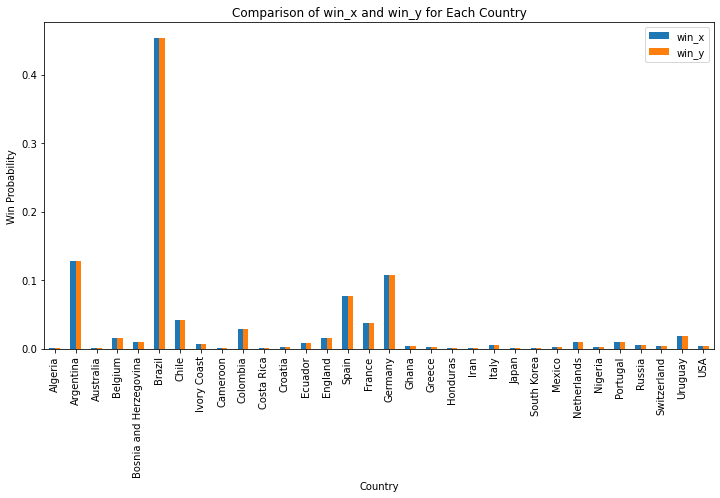

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Your merged data (assuming you have it loaded as merged_data)
# Example data:
# merged_data = pd.read_csv('your_merged_data.csv')

# Select the relevant columns for the comparison
comparison_data = merged_data[['country', 'win_x', 'win_y']]

# Set the 'country' column as the index
comparison_data.set_index('country', inplace=True)

# Plot a bar chart to compare 'win_x' and 'win_y' for each country
comparison_data.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of win_x and win_y for Each Country")
plt.xlabel("Country")
plt.ylabel("Win Probability")
plt.legend(["win_x", "win_y"])
plt.show()


We can see that the prediction of winning the World Cup is stable, the possibility didn't change in a week. The prediction of winning the World Cup is reliable.